In [1]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [80]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

In [65]:
pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 100)

# 1.Lecture des données


In [17]:
incidents_folder_path: str = r'H:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\data\raw\london-fire-brigade-incident-records'

### Acronyms

In [68]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2'])
display(metadata)

,Column,Description2
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


### 1.1 Lecture des données "Incidents"

In [104]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_14604\2947356504.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),


In [105]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

display(incident_data_from_2009_to_2017.head(5))
display(incident_data_from_2009_to_2017.shape)
display(incident_data_from_2018_to_onwards.head(5))
display(incident_data_from_2018_to_onwards.shape)

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


(988279, 39)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,000008-01012018,2018-01-01,2018,0:04:25,0,False Alarm,AFA,NaN,Non Residential,Mosque,Within same building,N2 8AY,N2,2.002201e+08,20013420,E09000003,BARNET,Barnet,E05013636,East Finchley,East Finchley,527184.0,189488.0,527150,189450,51.589900,-0.165453,London,Finchley,348.0,Finchley,NaN,NaN,1.0,1.0,1,60,328,1.0
1,000009-01012018,2018-01-01,2018,0:04:30,0,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,Correct incident location,BR3 1ED,BR3,1.000229e+11,20301747,E09000006,BROMLEY,Bromley,E05013987,Beckenham Town & Copers Cope,Beckenham Town & Copers Cope,537430.0,169565.0,537450,169550,51.408463,-0.025394,London,Beckenham,144.0,Beckenham,NaN,NaN,1.0,1.0,1,60,328,1.0
2,000010-01012018,2018-01-01,2018,0:04:34,0,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,On land associated with building,N13 5SX,N13,2.070869e+08,20704500,E09000010,ENFIELD,Enfield,E05013683,Highfield,Highfield,531901.0,193161.0,531950,193150,51.621823,-0.096022,London,Edmonton,232.0,Southgate,NaN,NaN,1.0,1.0,1,60,328,1.0
3,000011-01012018,2018-01-01,2018,0:04:58,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,EN1 4LD,EN1,2.071540e+08,20702569,E09000010,ENFIELD,Enfield,E05013677,Carterhatch,Carterhatch,534799.0,197474.0,534750,197450,51.659894,-0.052524,London,Enfield,22.0,Enfield,NaN,NaN,1.0,1.0,1,60,328,1.0
4,000014-01012018,2018-01-01,2018,0:07:47,0,Fire,Primary Fire,NaN,Road Vehicle,Car,In street outside gazetteer location,E15 1QY,E15,1.002400e+10,22200068,E09000025,NEWHAM,Newham,E05013917,Maryland,Maryland,539451.0,185362.0,539450,185350,51.549924,0.009877,London,Stratford,241.0,Stratford,NaN,NaN,1.0,1.0,1,60,328,6.0


(703082, 39)

In [37]:
incidents_df.shape

(1691361, 39)

Ce dataset **incidents** après merge contient **1691361 lignes et 39 colonnes**

In [91]:
incidents_df.sample(3)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
149299,25019101.0,2010-02-16,2010,08:34:24,8,Special Service,Special Service,No action (not false alarm),Outdoor,Road surface/pavement,In street remote from gazetteer location,E15 2AB,E15,NaN,NaN,E09000031,WALTHAM FOREST,Waltham Forest,E05013882,Cann Hall,Cann Hall,539010.0,185608.0,539050,185650,51.552243,0.003618,London,Leytonstone,194.0,Leytonstone,NaN,NaN,1.0,1.0,1,60,260,1.0
410290,163882-02122021,2021-12-02,2021,18:46:20,18,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,NW8,0.0,8400481.0,E09000033,WESTMINSTER,Westminster,E05013794,Church Street,Church Street,NaN,NaN,527150,182450,NaN,NaN,London,Paddington,280.0,Paddington,485.0,Euston,2.0,2.0,2,138,810,1.0
407929,160241-25112021,2021-11-25,2021,18:02:32,18,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,HA7,0.0,21202282.0,E09000015,HARROW,Harrow,E05013560,Stanmore,Stanmore,NaN,NaN,516450,192850,NaN,NaN,London,Stanmore,377.0,Stanmore,NaN,NaN,1.0,1.0,1,60,352,1.0


In [106]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691361 entries, 0 to 703081
Data columns (total 39 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 int64         
 3   TimeOfCall                              object        
 4   HourOfCall                              int64         
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       object  

In [107]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
incidents_df['TimeOfCall'] =  pd.to_datetime(incidents_df['TimeOfCall'], format=r'%H:%M:%S')
incidents_df['MonthOfCall'] = pd.to_datetime(incidents_df['DateOfCall']).dt.month

<Axes: ylabel='count'>

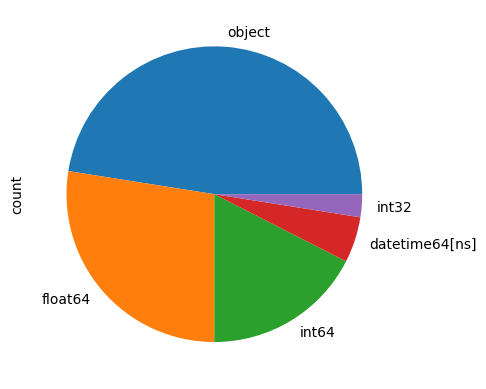

In [102]:
incidents_df.dtypes.value_counts().plot.pie()

Des valeurs manquantes existent la base de données.

In [94]:
incidents_df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1146589
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              837554
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               304
IncGeo_WardName                               304


Liste des colonnes ayant des valeurs manquantes.

In [95]:
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ]

SpecialServiceType                        1146589
Postcode_full                              837554
UPRN                                       141333
USRN                                       162871
IncGeo_WardCode                               304
IncGeo_WardName                               304
IncGeo_WardNameNew                            304
Easting_m                                  837554
Northing_m                                 837554
Latitude                                   837554
Longitude                                  837554
IncidentStationGround                           1
FirstPumpArriving_AttendanceTime           131659
FirstPumpArriving_DeployedFromStation      131670
SecondPumpArriving_AttendanceTime         1086450
SecondPumpArriving_DeployedFromStation    1086457
NumStationsWithPumpsAttending               13107
NumPumpsAttending                           13107
NumCalls                                     1846
dtype: int64

### Analyse descriptive des variables continue.

In [103]:
incidents_df.describe()

,DateOfCall,CalYear,TimeOfCall,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,MonthOfCall
count,1691361,1.691361e+06,1691361,1.691361e+06,1.550028e+06,1.528490e+06,853807.000000,853807.000000,1.691361e+06,1.691361e+06,853807.000000,853807.000000,1.559702e+06,604911.000000,1.678254e+06,1.678254e+06,1.691361e+06,1.691361e+06,1.691361e+06,1.689515e+06,1.691361e+06
mean,2016-08-07 02:19:30.122759680,2.016099e+03,1900-01-01 13:58:20.851752704,1.347415e+01,2.216739e+10,2.030646e+07,530633.993650,180364.044359,5.306637e+05,1.804959e+05,51.451775,-0.118846,3.180479e+02,394.924834,1.367176e+00,1.554516e+00,1.591760e+00,7.632328e+01,3.974395e+02,1.330867e+00,6.537394e+00
min,2009-01-01 00:00:00,2.009000e+03,1900-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00,1.000000e+00
25%,2012-06-12 00:00:00,2.012000e+03,1900-01-01 09:51:35,9.000000e+00,0.000000e+00,2.040096e+07,525198.500000,175988.000000,5.252500e+05,1.761500e+05,51.468933,-0.197280,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00,4.000000e+00
50%,2016-08-21 00:00:00,2.016000e+03,1900-01-01 14:45:41,1.400000e+01,0.000000e+00,2.120124e+07,530796.000000,180982.000000,5.309500e+05,1.810500e+05,51.512882,-0.117025,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00,7.000000e+00
75%,2020-09-13 00:00:00,2.020000e+03,1900-01-01 19:02:02,1.900000e+01,1.001403e+10,2.210116e+07,536833.000000,184935.000000,5.362500e+05,1.851500e+05,51.547736,-0.028804,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00,9.000000e+00
max,2024-03-31 00:00:00,2.024000e+03,1900-01-01 23:59:59,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,6.111500e+05,3.024500e+05,51.691670,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02,1.200000e+01
std,NaN,4.590807e+00,NaN,6.246800e+00,4.776722e+10,4.379204e+06,10329.435022,7437.720221,9.721260e+03,7.355635e+03,1.687489,0.148906,1.388444e+02,153.510240,6.774396e-01,8.372198e-01,1.588198e+00,5.765348e+02,2.724155e+03,1.489883e+00,3.410754e+00


### 1.2 Lecture des données "Mobilisation"

In [15]:
## 1.1 Lecture des données "Mobilisation"


In [7]:
df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")

df1.sample(10)

C:\Users\courio\AppData\Local\Temp\ipykernel_14604\343694789.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
240330,187467101.0,05-Nov-10,2010,16:34:37,16,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,Nearby address - street not listed in gazetteer,NaN,BR2,0.000000e+00,NaN,E09000006,BROMLEY,Bromley,E05013990,Bromley Common & Holwood,Bromley Common & Holwood,NaN,NaN,542050,165650,NaN,NaN,London,Bromley,609.0,Bromley,769.0,Bromley,1.0,2.0,2,60,260,1.0
213419,140402101.0,16-Aug-10,2010,21:14:54,21,Special Service,Special Service,Suicide/attempts,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,In street close to gazetteer location,NaN,SE5,0.000000e+00,NaN,E09000028,SOUTHWARK,Southwark,E05000535,Camberwell Green,Camberwell Green,NaN,NaN,532750,177250,NaN,NaN,London,Peckham,261.0,Peckham,NaN,NaN,1.0,1.0,1,60,260,1.0
316031,101765111.0,29-Jun-11,2011,21:17:23,21,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Within same building,NaN,N15,0.000000e+00,21102903.0,E09000014,HARINGEY,Haringey,E05013599,South Tottenham,South Tottenham,NaN,NaN,533950,189150,NaN,NaN,London,Tottenham,191.0,Tottenham,204.0,Tottenham,1.0,2.0,2,60,260,1.0
125365,218208091.0,04-Dec-09,2009,15:07:49,15,False Alarm,False alarm - Good intent,NaN,Non Residential,Pre School/nursery,Correct incident location,N22 6PU,N22,1.002294e+10,21104795.0,E09000014,HARINGEY,Haringey,E05013595,Noel Park,Noel Park,531879.0,190204.0,531850,190250,51.595256,-0.097450,London,Tottenham,1103.0,Tottenham,NaN,NaN,1.0,1.0,1,60,260,1.0
627407,73254141.0,11-Jun-14,2014,11:16:45,11,False Alarm,AFA,NaN,Non Residential,Pre School/nursery,Within same building,NW7 2AQ,NW7,2.002201e+08,20012952.0,E09000003,BARNET,Barnet,E05013645,Mill Hill,Mill Hill,521801.0,191443.0,521850,191450,51.608659,-0.242439,London,Mill Hill,210.0,Mill Hill,NaN,NaN,1.0,1.0,1,60,295,1.0
943695,102059-28072017,28-Jul-17,2017,17:51:36,17,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,N22,0.000000e+00,21104796.0,E09000014,HARINGEY,Haringey,E05013595,Noel Park,Noel Park,NaN,NaN,531050,190050,NaN,NaN,London,Hornsey,NaN,NaN,NaN,NaN,1.0,1.0,1,60,328,2.0
520164,63649131.0,20-May-13,2013,10:46:20,10,False Alarm,AFA,NaN,Non Residential,Infant/Primary school,Correct incident location,E17 6ED,E17,2.000014e+11,22845150.0,E09000031,WALTHAM FOREST,Waltham Forest,E05013892,Higham Hill,Higham Hill,536266.0,190023.0,536250,190050,51.592585,-0.034225,London,Walthamstow,161.0,Walthamstow,NaN,NaN,1.0,1.0,1,60,290,1.0
468318,138845121.0,09-Nov-12,2012,21:50:01,21,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,SE14,0.000000e+00,22000331.0,E09000023,LEWISHAM,Lewisham,E05013719,Deptford,Deptford,NaN,NaN,536350,177550,NaN,NaN,London,Deptford,274.0,Deptford,325.0,New Cross,2.0,2.0,2,85,368,1.0
426052,19779122.0,23-Jun-12,2012,13:15:11,13,Special Service,Special Service,Medical Incident,Outdoor,Cycle path/public footpath/bridleway,In street close to gazetteer location,E4 8JL,E4,NaN,NaN,E09000031,WALTHAM FOREST,Waltham Forest,E05013894,Larkswood,Larkswood,537387.0,192732.0,537350,192750,51.616656,-0.016992,London,Chingford,60.0,Chingford,NaN,NaN,1.0,1.0,1,60,260,1.0
188080,92928101.0,13-Jun-10,2010,23:47:45,23,Fire,Primary Fire,NaN,Road Vehicle,Car,On land associated with building,BR1 5DP,BR1,1.000204e+11,20302326.0,E09000006,BROMLEY,Bromley,E05014

In [10]:
display(df1.columns)
print(len(df1.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [12]:
df2 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2018 onwards.csv", encoding='unicode_escape')

df2.sample(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
134877,048019-21042019,21-Apr-19,2019,14:53:19,14,False Alarm,AFA,NaN,Non Residential,Distillery plant,Within same building,CR0 4XN,CR0,5.870101e+09,22605604,E09000029,SUTTON,Sutton,E05013754,Beddington,Beddington,530253.0,166711.0,530250,166750,51.384507,-0.129572,London,Croydon,383.0,Croydon,NaN,NaN,1.0,1.0,1,60,339,1.0
262366,086903-15072020,15-Jul-20,2020,17:31:53,17,False Alarm,AFA,NaN,Non Residential,Leisure Centre,Within same building,W3 6NE,W3,1.218031e+07,20602317,E09000009,EALING,Ealing,E05013536,South Acton,South Acton,520386.0,180030.0,520350,180050,51.506393,-0.266754,London,Acton,216.0,Acton,NaN,NaN,1.0,1.0,1,60,346,1.0
5938,009942-24012018,24-Jan-18,2018,15:08:53,15,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,W11,0.000000e+00,8400531,E09000033,WESTMINSTER,Westminster,E05013793,Bayswater,Bayswater,NaN,NaN,525050,181050,NaN,NaN,London,North Kensington,305.0,North Kensington,323.0,Kensington,2.0,2.0,2,60,328,2.0
321341,019167-18022021,18-Feb-21,2021,18:02:34,18,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,CR0 3HF,CR0,1.000206e+11,20500756,E09000008,CROYDON,Croydon,E05011488,WEST THORNTON,WEST THORNTON,530907.0,166877.0,530950,166850,51.385854,-0.120113,London,Norbury,249.0,Croydon,NaN,NaN,1.0,1.0,1,60,346,1.0
230816,032371-15032020,15-Mar-20,2020,5:18:11,5,False Alarm,AFA,NaN,Other Residential,Student Hall of Residence,Correct incident location,WC1E 6AP,WC1E,5.109768e+06,20400959,E09000007,CAMDEN,Camden,E05013653,Bloomsbury,Bloomsbury,529550.0,182154.0,529550,182150,51.523457,-0.134017,London,Euston,228.0,Euston,384.0,Soho,2.0,2.0,2,60,339,1.0
31855,052249-28042018,28-Apr-18,2018,23:54:02,23,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,NW3,0.000000e+00,20025080,E09000003,BARNET,Barnet,E05013641,Garden Suburb,Garden Suburb,NaN,NaN,526650,187350,NaN,NaN,London,West Hampstead,464.0,West Hampstead,485.0,West Hampstead,1.0,2.0,2,60,333,1.0
504745,151266-11092022,11-Sep-22,2022,0:13:39,0,Special Service,Special Service,Advice Only,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,TW3,0.000000e+00,21500223,E09000018,HOUNSLOW,Hounslow,E05013620,HOUNSLOW CENTRAL,HOUNSLOW CENTRAL,NaN,NaN,514250,176050,NaN,NaN,London,Heston,251.0,Heston,NaN,NaN,1.0,1.0,1,60,364,1.0
694128,037043-05032024,5-Mar-24,2024,15:22:36,15,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,NaN,CR7,0.000000e+00,20500968,E09000008,CROYDON,Croydon,E05011486,THORNTON HEATH,THORNTON HEATH,NaN,NaN,532450,168250,NaN,NaN,London,Norbury,342.0,Norbury,347.0,Norbury,3.0,5.0,5,61,394,1.0
287657,130040-08102020,8-Oct-20,2020,11:32:01,11,False Alarm,False alarm - Good intent,NaN,Non Residential,Train station - elsewhere,Correct incident location,EC2M 7PY,EC2M,2.000001e+11,8100056,E09000001,CITY OF LONDON,City Of london,E05009292,BISHOPSGATE,BISHOPSGATE,533274.0,181600.0,533250,181650,51.517611,-0.080566,London,Shoreditch,404.0,Dowgate,NaN,NaN,1.0,1.0,1,60,346,1.0
249156,064001-28052020,28-May-20,2020,13:02:45,13,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW10,0.000000e+00

In [13]:
display(df2.columns)
print(len(df2.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [ ]:
df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)